In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import copy
import tensorflow as tf


In [104]:
dataf = pd.read_csv("./data/SeoulBikeData.csv", encoding ='ISO-8859-1')
#adding the encoding cause the data has a different encoding other than UTF-8

In [105]:
# Having a look at the features to analyze which features should be used and which should be dropped. 
dataf.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [106]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [107]:
dataf.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [108]:
# No null values. Let's assume that we do not require the date, seasons, and holiday columns.
df = pd.read_csv("./data/SeoulBikeData.csv", encoding = 'ISO-8859-1').drop(["Date", "Holiday", "Seasons"], axis=1)

In [109]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df.columns = dataset_cols

In [110]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [111]:
# Now we see that the functional feature contains categorical data, so we need to convert it to numbers 1 and 0, representing yes or no.
df["functional"].unique()

array(['Yes', 'No'], dtype=object)

In [112]:
df["functional"] = (df["functional"]=="Yes").astype(int)

In [113]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [114]:
# To simplify the problem, we will only use the bike_count at noon.
df[df["hour"]==12].count()

bike_count     365
hour           365
temp           365
humidity       365
wind           365
visibility     365
dew_pt_temp    365
radiation      365
rain           365
snow           365
functional     365
dtype: int64

In [115]:
(df["hour"] == 12).sum()

365

In [116]:
df = df[df["hour"]==12]

In [117]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 12 to 8748
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bike_count   365 non-null    int64  
 1   hour         365 non-null    int64  
 2   temp         365 non-null    float64
 3   humidity     365 non-null    int64  
 4   wind         365 non-null    float64
 5   visibility   365 non-null    int64  
 6   dew_pt_temp  365 non-null    float64
 7   radiation    365 non-null    float64
 8   rain         365 non-null    float64
 9   snow         365 non-null    float64
 10  functional   365 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 34.2 KB


In [119]:
# After this, we do not really require the hour column.
df.drop("hour", axis=1, inplace=True)

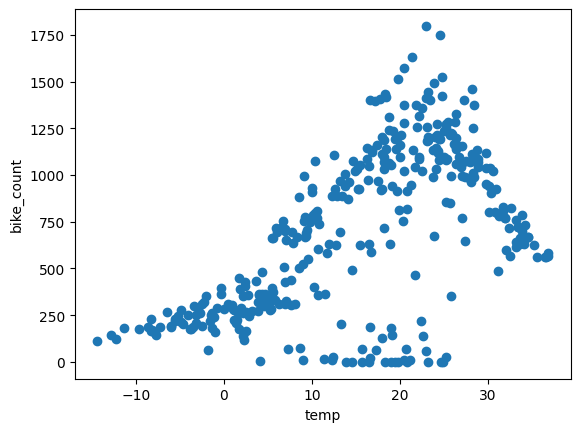

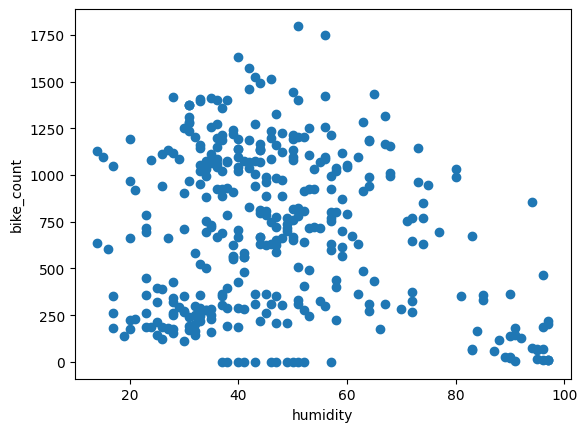

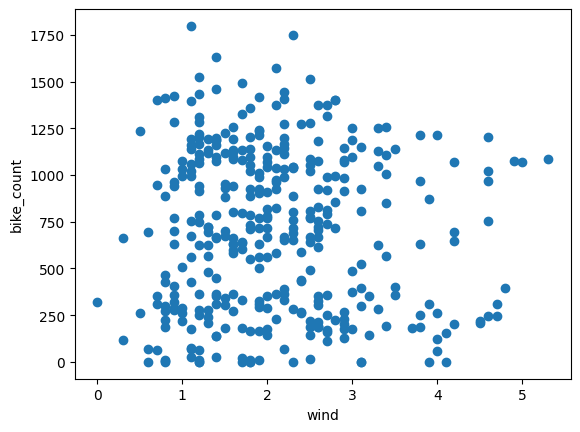

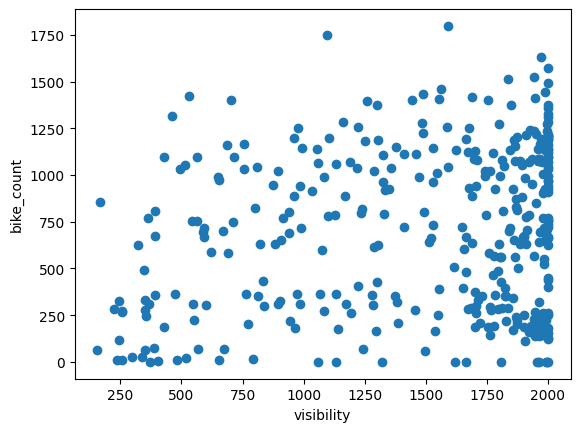

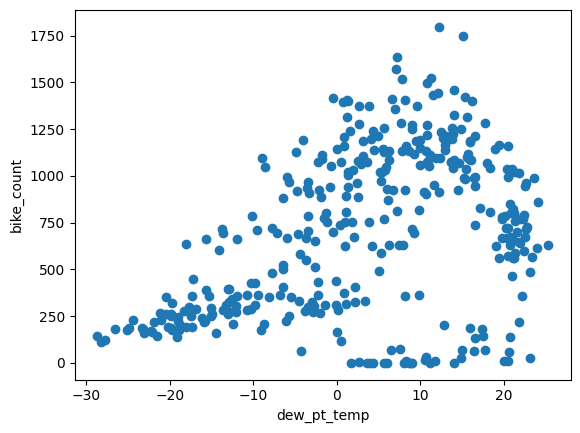

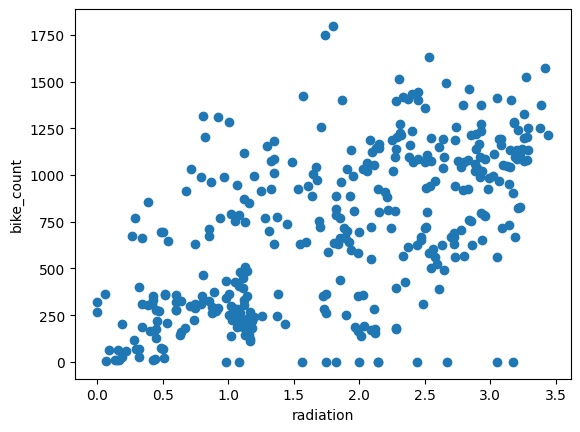

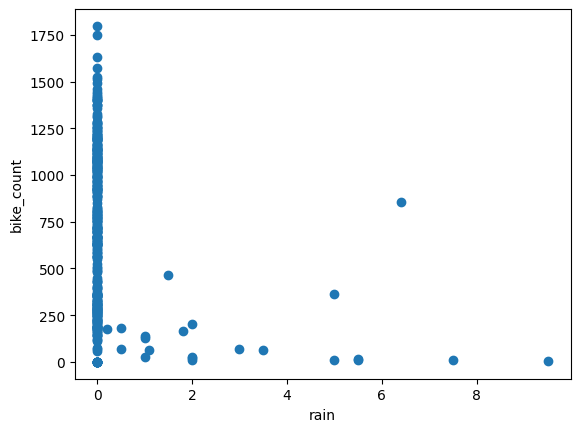

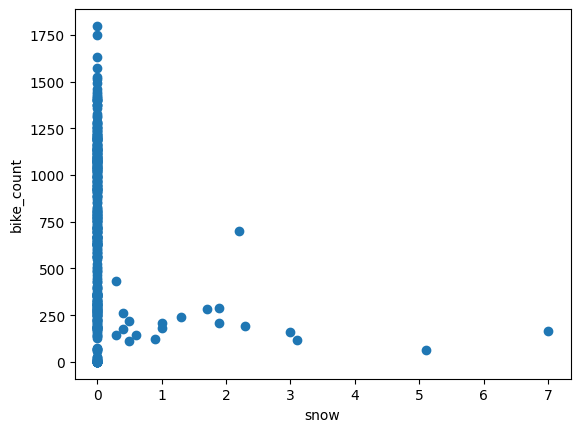

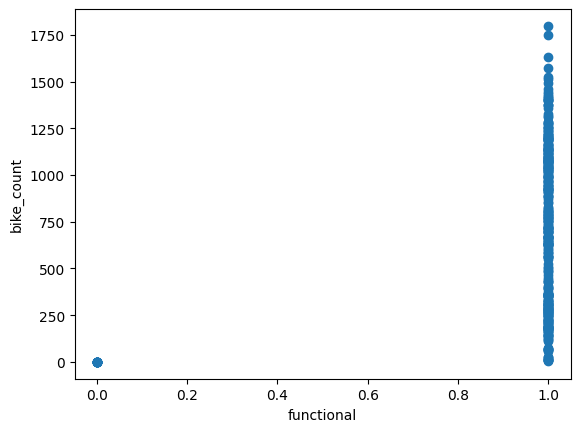

In [120]:
# Now we plot a scatter plot to see which variables suggest the most important assumption of linearity in the relationship.
for cols in df.columns[1:]:
    plt.scatter(df[cols],df["bike_count"])
    plt.xlabel(cols)
    plt.ylabel("bike_count")
    plt.show()

In [121]:
# We drop whatever is suggested first for analysis.
df = df.drop(["wind","visibility","functional"], axis=1)

In [122]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [123]:
#we deivse a method to get xy for all simple, and multiple regression
def get_xy(dataframe,ylabel,xlabel= None): #to start with it would be none unless you mention it to be one, two or more
    dataframe = copy.deepcopy(dataframe) # creating a deepcopy as we have to use it latee fro multiple linear regression too
    if xlabel is None:
        X = df[xlabel].values
    else:
        if len(xlabel)==1:
            X = df[xlabel[0]].values.reshape(-1,1)   #as we are using scikit learn it requires 2d array to opearte hence we reshape it
        else:
            X = df[xlabel].values
    
    y = df[ylabel].values.reshape(-1,1)  # here reshaping cause we have just got bike_count as a oned single array 
    
    data = np.hstack((X,y))
    return data, X, y

# Simple Regression

In [124]:
# Dividing the data into training, validation, and test sets.
train, test, valid = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [125]:
#simple linear regression, only one input variable
_, X_train_temp, y_train_temp = get_xy(train, ylabel="bike_count", xlabel=["temp"])
_, X_val_temp, y_val_temp = get_xy(valid, ylabel="bike_count", xlabel=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, ylabel="bike_count", xlabel=["temp"])

In [126]:
from sklearn.linear_model import LinearRegression
simple_reg = LinearRegression()
simple_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [127]:
simple_reg.score(X_test_temp, y_train_temp)

0.330867186499053

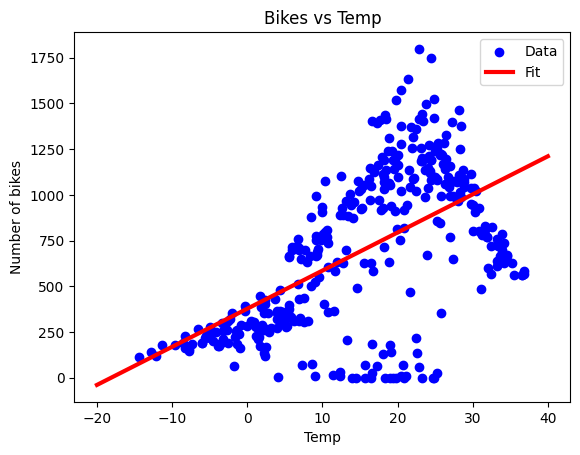

In [128]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100) # here randomly creating array of 100 values that range from -20 to 40(temperature in this case which is synthetic)
plt.plot(x, simple_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)  #here x is served from above created x using tensorflow, we are reshaping x because in this cas its just a 1d array that is temp
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# Multiple Linear Regression

In [129]:
#multiple linear regression
train, test, valid = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))]) #not needed though
_, X_train_all, y_train_all = get_xy(train, ylabel="bike_count", xlabel=df.columns[1:])
_, X_val_all, y_val_all = get_xy(valid, ylabel="bike_count", xlabel=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, ylabel="bike_count", xlabel=df.columns[1:])

In [130]:
multiple_regression = LinearRegression()

In [131]:
multiple_regression.fit(X_train_all, y_train_all)

LinearRegression()

In [132]:
multiple_regression.score(X_test_all,y_test_all)

0.48323001842092683

In [133]:
print(df.columns[1:])

Index(['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain', 'snow'], dtype='object')


In [134]:
#no scatter plot because multiple dimensions, so try to how to visualise this

# Simple Linear Regression using Neural Net

In [135]:
# we are initializing the normalizer layer so that it can perfrom normalizer to our input
# the input_shape just tells that the 
#input is only one feature temperature, since the values for temp and bike_count are not on the same scale we 
#normalize it, axis=None states that do that normalization across all inputs(temp in this case)
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis= None) 
temp_normalizer.adapt(X_train_temp.reshape(-1)) #reshaping cause again its it just a 1d column right now we want it as 2d
# we need not normalize the target variable cause its quiet evident that we are not going to use it for predictions 

In [136]:
# why are we putting in the noarmlizer layer here if we have already noramlised the data, but here 
#  only the training data is guarenteed to be normalized, but whatever testing/unseen data comes in the future wont be normalised
temp_nn_model = tf.keras.Sequential([
    temp_normalizer, 
    tf.keras.layers.Dense(1) # just creating one dense layer, because one input and no activation fucntion means it a linear function 
])

In [137]:
temp_nn_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [138]:
history = temp_nn_model.fit(
                            X_train_temp.reshape(-1,), y_train_temp, # here only the temperature is converted to a vector using reshape cause the model expect the input to be 2d but not the target
                            epochs = 1000,
                            verbose = 0, #commenting this to see what is hapenning
                            validation_data = (X_val_temp, y_val_temp)
    )

In [139]:
def plot_loss(history):
    plt.plot(history.history['val_loss'], label = "validation_loss") #validation loss
    plt.plot(history.history['loss'], label ="loss") #loss from the model itself
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True) # adding grids in the plot to be seen below
    plt.show()

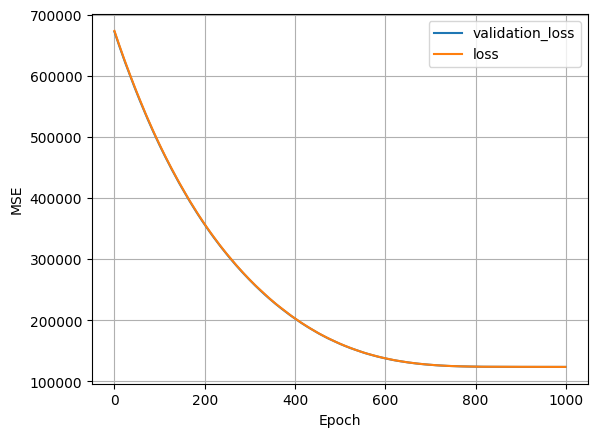

In [140]:
plot_loss(history)

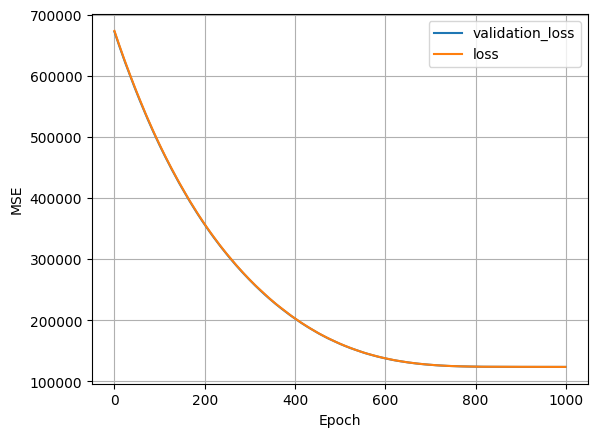

In [141]:
# recording the mistake that I have done here, have kept the learning rate very low and since then the model is 
# learning very slowly or 
# this can be the case :The data might not be well-scaled or normalized, despite using a normalization layer. 
# Ensure that the features (in this case, temp) are properly scaled, as large feature values can lead to large losses.
# increasing the learning rate, and then plotting(learning_rate=0.01 from 0.001)
plot_loss(history)

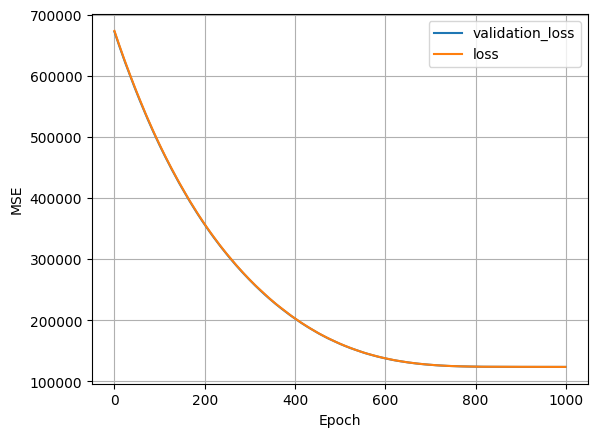

In [142]:
# still no conversion so increasing the learning rate here to 0.1 and then plotting
plot_loss(history)

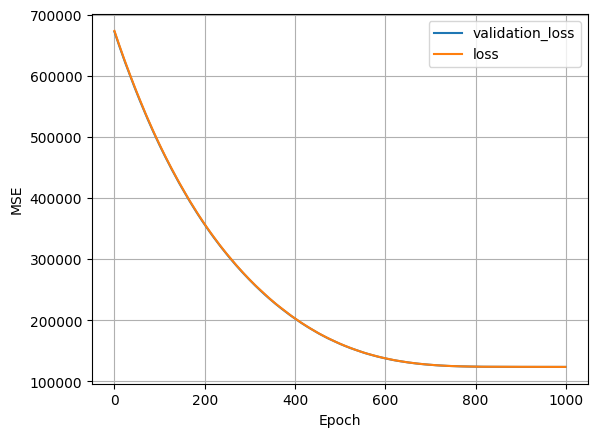

In [143]:
# cannot see much difference in the plots for loss and validation loss, so just plotting the loss before validation
# loss as it could be seen on the graph
plot_loss(history)

In [144]:
# The model's training loss (loss) and validation loss (val_loss) are converging to nearly the same value, 
# indicating that the model is fitting well to both the training and validation data. This is usually a good sign,
# as it suggests that the model is not overfitting or underfitting significantly.
# Since the two lines are so close to each other, even if we try to plot one line first (validation loss), 
# both lines overlap almost perfectly. That's why we don't see the blue line clearly on top. 
# This is due to the very small difference between the values of loss and val_loss, which results in the graph appearing to show just one line.

4/4 [==============================] - 0s 563us/step


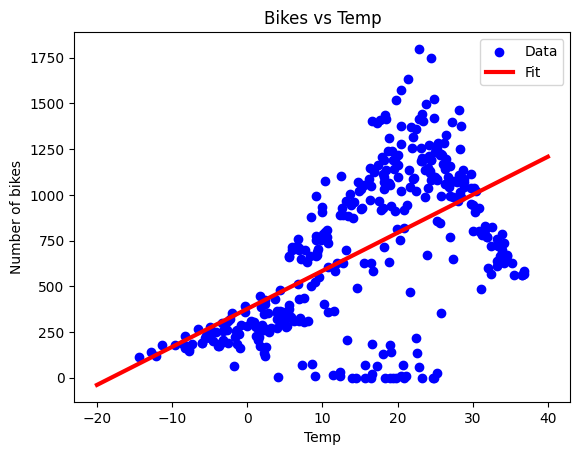

In [145]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100) # here randomly creating array of 100 values that range from -20 to 40(temperature in this case that are synthetic)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)  #here x is served from above created x using tensorflow, we are reshaping x because in this cas its just a 1d array that is temp
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [146]:
# Multiple Linear Regression using Neural Net
multiple_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis= None)
multiple_normalizer.adapt(X_train_all)

In [147]:
multiple_nn_model = tf.keras.Sequential([
    multiple_normalizer,
    tf.keras.layers.Dense(1)
])

In [148]:
multiple_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = "mean_squared_error")

In [149]:
multiple_history = multiple_nn_model.fit(
    X_train_all, 
    y_train_all,
    epochs = 1000,
    validation_data = (X_val_all, y_val_all),
    verbose = 0
)

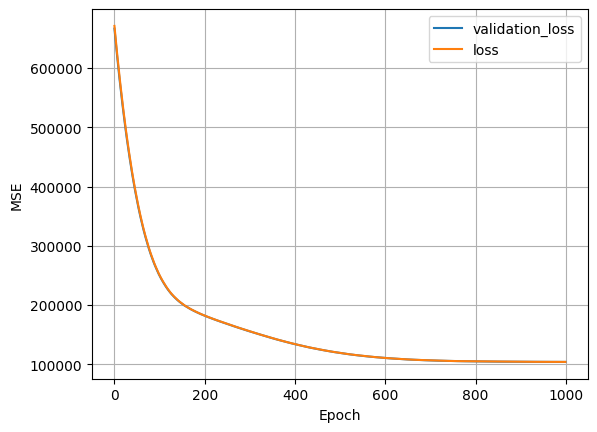

In [150]:
plot_loss(multiple_history)

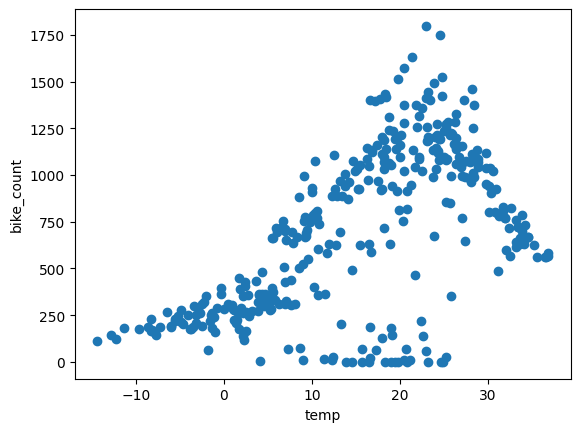

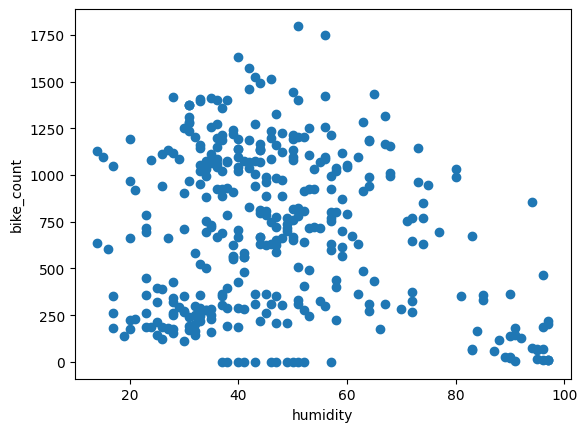

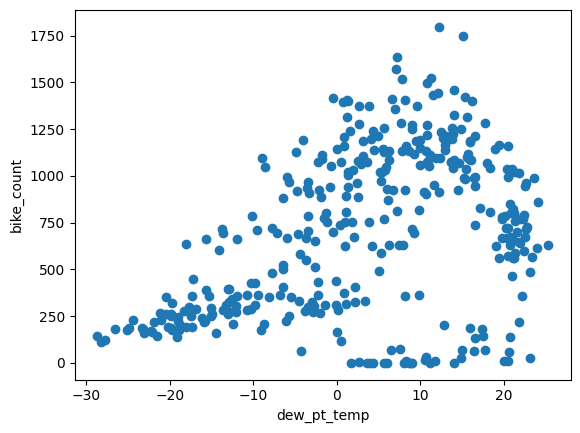

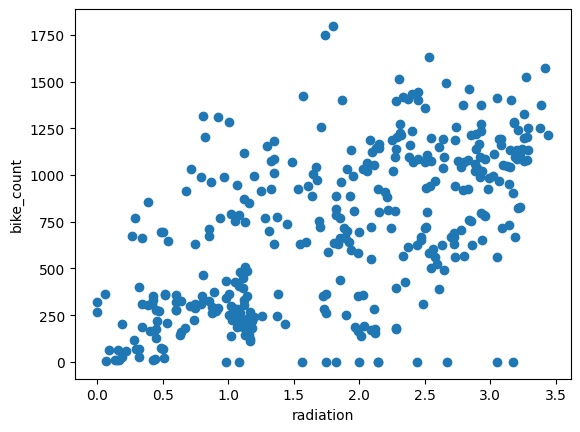

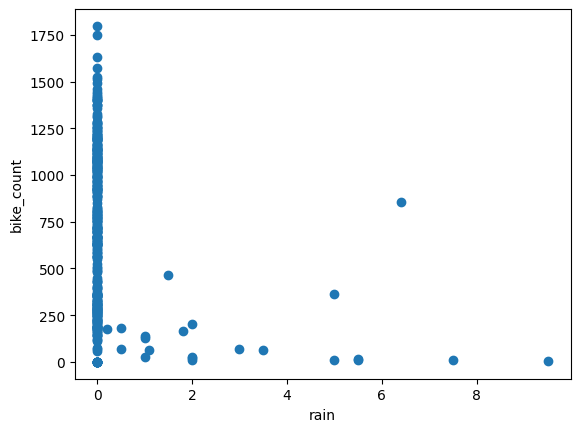

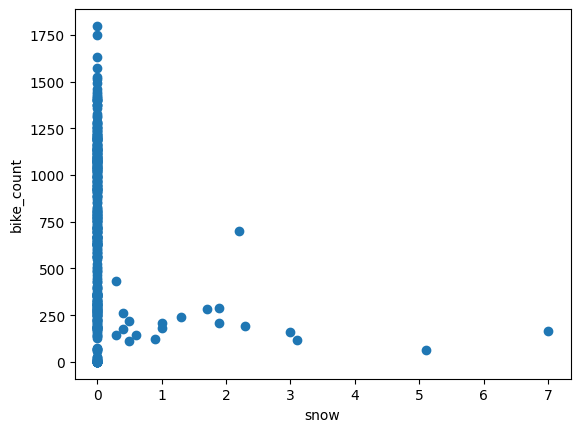

In [151]:
for i in df.columns[1:]:
    plt.scatter(df[i],df["bike_count"])
    plt.xlabel(i)
    plt.ylabel("bike_count")
    plt.show()

In [152]:
# I cannot see any linearity with rain and snow too lets try to drop those and see what effect does it have on both
# multiple regressions (with and without nerual net)
df =df.drop(["rain","snow"], axis=1)

In [153]:
train, test, valid = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [154]:
_, X_train, y_train = get_xy(train, ylabel="bike_count", xlabel=df.columns[1:])
_, X_val, y_val = get_xy(valid, ylabel="bike_count", xlabel=df.columns[1:])
_, X_test, y_test = get_xy(test, ylabel="bike_count", xlabel=df.columns[1:])

In [155]:
multpile_regression_final = LinearRegression()

In [156]:
multpile_regression_final.fit(X_train, y_train)

LinearRegression()

In [157]:
multpile_regression_final.score(X_test, y_test)# there is  slight drop in the score

0.47971832199893527

In [158]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation'], dtype='object')

In [159]:
# Multiple Linear regression using neural net
normalize = tf.keras.layers.Normalization(input_shape = (4,), axis=None)
normalize.adapt(X_train)

In [160]:
multiple_Reg_nn = tf.keras.Sequential([
    normalize,
    tf.keras.layers.Dense(1)
]
)

In [161]:
multiple_Reg_nn.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),loss="mean_squared_error")

In [162]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Stop training after 10 epochs of no improvement
    restore_best_weights=True  # Restore the best weights after stopping
)

In [163]:
history_final = multiple_Reg_nn.fit(
    X_train, 
    y_train,
    epochs = 1000,
    validation_data = (X_val, y_val),
    callbacks = [early_stopping],
    verbose = 0
    
)

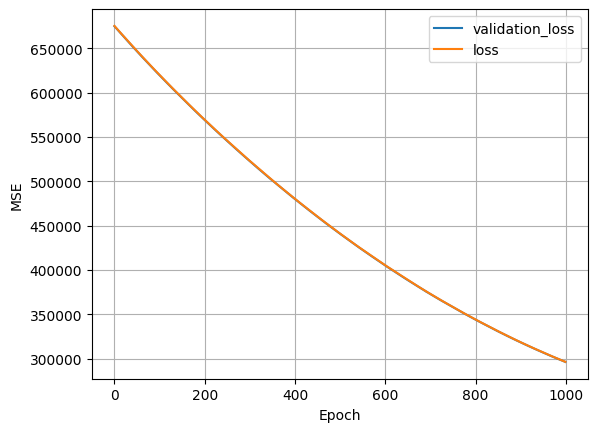

In [164]:
plot_loss(history_final)

In [165]:
# Since the model is not imporving we can incorporte callbacks=[early_stopping], 
# enables the neural netwrok to stop if its not improving to stop overfitting, adding it up in the code
# and then playing with the learning rate

In [166]:
# You're correct in your reasoning that removing features that do not contribute linearly
# to the target variable should lead to better model performance. However, the fact that 
# the model with 4 features is not converging as well as the one with 6 features can still 
# be explained by a few nuances in how neural networks learn:

# Interaction Effects: 
# While the snow and rain features may not show linear relationships with the target variable 
# individually, they could have interactions with other features that help the model learn. 
# Removing them might disrupt potential interaction effects that are beneficial for the model.

# Information Loss: 
# By removing features, you may inadvertently remove useful information, even if that 
# information isn't captured in a linear form. Neural networks, unlike traditional linear 
# regression, can capture complex non-linear relationships, and sometimes features that 
# appear irrelevant at first can provide additional context.

# Redundancy and Diversity: 
# The 6-feature model may have a more diverse set of information, allowing the model 
# to generalize better. Sometimes, redundancy in features can help stabilize learning. 
# Removing features may reduce this redundancy and make the model more sensitive to 
# noise or outliers in the remaining features.

# Normalization Effects: 
# Ensure that the normalization is applied consistently. Sometimes, features with less 
# variance can get overshadowed after normalization, especially when fewer features 
# are present.

# Data Representation: 
# If the remaining features (in the 4-feature model) are not sufficient to represent the 
# variance in the data, the model may struggle to learn. The architecture and learning 
# capacity need to align with the complexity of the data.

# Training Dynamics: 
# It’s also possible that the training dynamics differ between the two setups. The model 
# with 6 features might find better local minima in the loss landscape, while the 
# 4-feature model could be getting stuck in worse local minima.

# Suggestions for Improvement
# Re-evaluate Feature Removal: 
# Consider conducting feature importance analysis to see if the removed features 
# have any potential relevance when combined with others.

# Feature Engineering: 
# You could create derived features based on existing ones. For example, you could 
# create interaction terms or polynomial features to see if that captures non-linearity.

# Adjust Hyperparameters: 
# Experiment with hyperparameters like the learning rate, batch size, and number of 
# epochs. Sometimes a small change can lead to significant improvements.

# Check for Data Quality: 
# Make sure that the data is clean and that there are no anomalies or outliers 
# affecting the performance of the model with fewer features.

# Use Regularization: 
# Adding L1 or L2 regularization can help improve the model’s robustness by 
# penalizing overly complex models.

# Try Different Architectures: 
# If you haven’t already, you might consider varying the architecture (adding layers, 
# changing activation functions) to see if that helps with convergence.

# By systematically exploring these aspects, you might find the underlying issue 
# affecting the performance of the model with 4 features.


In [167]:
# Using a complete Nerual Network
temp_normalizer_nn = tf.keras.layers.Normalization(input_shape=(1,),axis= None) 
temp_normalizer_nn.adapt(X_train_temp.reshape(-1))
nn_model = tf.keras.Sequential([
    temp_normalizer_nn,
    tf.keras.layers.Dense(32, activation = 'relu'), # relu restricts the optput to be non negative, anything zero or below it is zero otherwise positvie
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu') # you want the model to output a single predicted value ( bike count). Therefore, only one neuron is needed in the output layer to generate that prediction.
])

nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss ="mean_squared_error")

In [168]:
history = nn_model.fit(
    X_train_temp,
    y_train_temp,
    epochs =100,
    verbose=0,
    validation_data=(X_val_temp,y_val_temp)
)

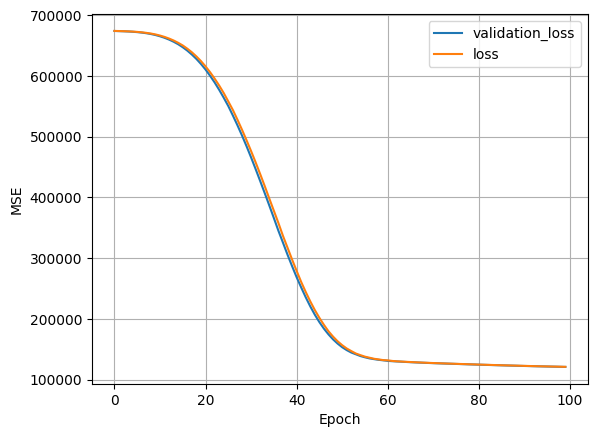

In [169]:
plot_loss(history)

In [170]:
# Observations:
# The loss and validation loss are almost same that means the model is learning well, the loss becomes marginal after a point(around 125750) 
# The neural network tries to approximate the relationship using the non-linear activation functions (like ReLU), but because the data has some inherent noise or variability, the loss might not reduce beyond a certain point, which explains why it stabilizes around 125,000.
# the first graph (bikes vs temperature), the data seems somewhat non-linear but shows an increasing trend as the temperature increases. However, there's a lot of variance (scatter) in the data, particularly at mid-range temperatures (around 10-20°C). This variance could make it difficult for the neural network to perfectly model the relationship between temperature and bike counts

4/4 [==============================] - 0s 598us/step


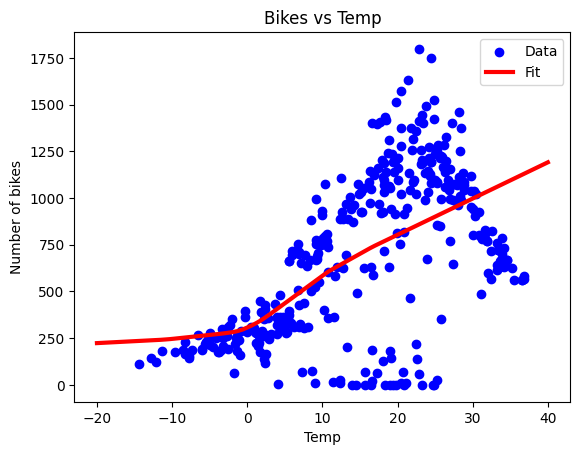

In [171]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100) # here randomly creating array of 100 values that range from -20 to 40(temperature in this case that are synthetic)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)  #here x is served from above created x using tensorflow, we are reshaping x because in this cas its just a 1d array that is temp
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [172]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

In [173]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [174]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

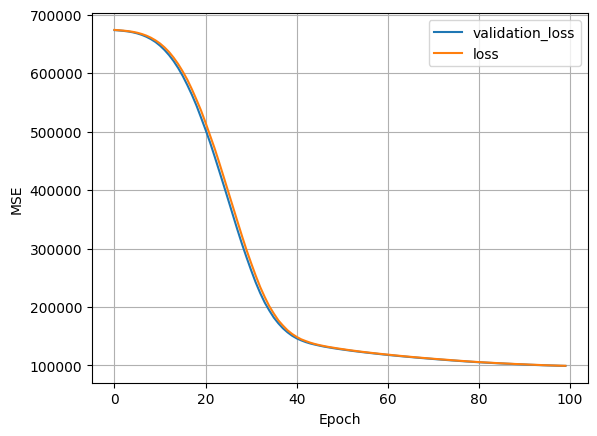

In [175]:
plot_loss(history)

In [176]:
# calculate the MSE for both linear reg and nn
y_pred_lr = multiple_regression.predict(X_test_all) #regrssion after simple linear regression with all six input features 
y_pred_nn = nn_model.predict(X_test_all)

12/12 [==============================] - 0s 403us/step


In [177]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean() # calculating MSE

In [178]:
MSE(y_pred_lr, y_test_all)

95616.74056812628

In [179]:
MSE(y_pred_nn, y_test_all)

99217.72852471472

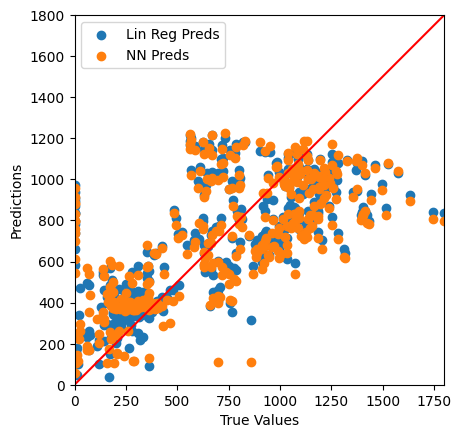

In [180]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")

In [181]:
# MSE Comparison: The Linear Regression model has a slightly lower MSE (95,616.74) than the Neural Network model (99,992.95), indicating better overall performance in terms of error minimization.

# Predictions Spread: Both models show a significant spread of predictions, especially for higher true values (above 600), indicating that neither model captures the high-end of the data very well.

# Underestimation for High Values: Both models tend to underestimate for larger true values (e.g., 1000+), as shown by predictions being below the red diagonal line for those values.

# Variance in Neural Network Predictions: The Neural Network's predictions have more variance than Linear Regression, with more points scattered further away from the red line, suggesting less consistency in capturing patterns, despite its complexity.

# Similar Performance at Lower Values: For lower true values (below 500), both models perform relatively similarly, with predictions closely following the diagonal line, suggesting good fit for smaller values in the dataset.

